In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

listings_url = 'http://data.insideairbnb.com/united-kingdom/scotland/edinburgh/2021-02-11/data/listings.csv.gz'

# Neighbourhood_cleansed
cols_listings = ['id',
                'number_of_reviews',
                'description',
                'property_type',
                'bedrooms',
                'price',
                'neighbourhood_cleansed',
                'minimum_nights',
                'maximum_nights',
                'reviews_per_month',
                'review_scores_rating',
                'review_scores_accuracy']

listings_df_orig = pd.read_csv(listings_url, usecols = cols_listings)
listings_df = listings_df_orig.copy()
  
calendar_url = 'http://data.insideairbnb.com/united-kingdom/scotland/edinburgh/2021-02-11/data/calendar.csv.gz'

# Koska datassa on kahteen kertaan price niin jätetään price pois tästä dataframesta
cols_calendar = ['listing_id',
                 'date',
                 'available',
             #    'price',
                 'adjusted_price']



calendar_df_orig = pd.read_csv(calendar_url, usecols = cols_calendar)
calendar_df = calendar_df_orig.copy()



In [3]:
df_comb = pd.merge(listings_df, calendar_df, left_on = 'id', right_on = 'listing_id', how = 'left').drop('listing_id', axis=1)

In [3]:
df_comb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2385718 entries, 0 to 2385717
Data columns (total 15 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   id                      int64  
 1   description             object 
 2   neighbourhood_cleansed  object 
 3   property_type           object 
 4   bedrooms                float64
 5   price                   object 
 6   minimum_nights          int64  
 7   maximum_nights          int64  
 8   number_of_reviews       int64  
 9   review_scores_rating    float64
 10  review_scores_accuracy  float64
 11  reviews_per_month       float64
 12  date                    object 
 13  available               object 
 14  adjusted_price          object 
dtypes: float64(4), int64(4), object(7)
memory usage: 291.2+ MB


In [4]:
df_comb.head()

,id,description,neighbourhood_cleansed,property_type,bedrooms,price,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,reviews_per_month,date,available,adjusted_price
0,15420,"Stunning, impeccably refurbished spacious grou...","Old Town, Princes Street and Leith Street",Entire apartment,1.0,$70.00,3,30,340,99.0,10.0,2.77,2021-02-12,f,$70.00
1,15420,"Stunning, impeccably refurbished spacious grou...","Old Town, Princes Street and Leith Street",Entire apartment,1.0,$70.00,3,30,340,99.0,10.0,2.77,2021-02-13,f,$70.00
2,15420,"Stunning, impeccably refurbished spacious grou...","Old Town, Princes Street and Leith Street",Entire apartment,1.0,$70.00,3,30,340,99.0,10.0,2.77,2021-02-14,f,$70.00
3,15420,"Stunning, impeccably refurbished spacious grou...","Old Town, Princes Street and Leith Street",Entire apartment,1.0,$70.00,3,30,340,99.0,10.0,2.77,2021-02-15,f,$70.00
4,15420,"Stunning, impeccably refurbished spacious grou...","Old Town, Princes Street and Leith Street",Entire apartment,1.0,$70.00,3,30,340,99.0,10.0,2.77,2021-02-16,f,$70.00


In [6]:
# Ei ole unique koska datet ovat kaikissa eri 
df_comb['id'].is_unique

False

In [7]:
df_cleaned = df_comb.groupby(['id']).size().sort_values(ascending=False)

In [8]:
df_cleaned.head(20)

id
21889773    366
28172680    366
14354240    366
7284290     366
37325283    366
7270306     366
16972634    366
30223536    366
24636147    366
458510      366
38202347    366
32002465    366
7210281     366
25509704    366
36258125    366
36491230    366
23197844    366
22305420    366
11155149    366
6424297     366
dtype: int64

In [54]:
# Koska datet ovat object-tyyppejä, vaihdetaan ne päivämääriksi
df_comb['date'] = pd.to_datetime(df_comb['date'])

KeyError: 'date'

In [5]:
# Muutetaan Nan-arvot nolliksi
df_comb = df_comb.fillna(0)
# Koska bedrooms on float
df_comb['bedrooms'] = df_comb['bedrooms'].astype('int64')

# Tarviiko available vaihtaa booliksi t = true, f = false
# Numerot ennen id:tä voisi mahdollisesti poistaa jossain kohtaa
#df_comb.set_index('id', inplace=True)

In [6]:
# Valitaan vain rivit, joissa id on sama 
df_one = df_comb.loc[df_comb['id']== 15420]
df_new_one = df_comb.loc[df_comb['id']== 15420]

In [12]:
# Tässä huomataan että datan päivämäärät heittävät vuoden --> pitäisi olla kerätty data 2021 helmikuussa mutta näyttää dataa vuodelle 2022 asti
df_one.head(200)

,id,description,property_type,bedrooms,price,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,reviews_per_month,date,available,adjusted_price
0,15420,"Stunning, impeccably refurbished spacious grou...",Entire apartment,1,$70.00,3,30,340,99.0,10.0,2.77,2021-02-12,f,$70.00
1,15420,"Stunning, impeccably refurbished spacious grou...",Entire apartment,1,$70.00,3,30,340,99.0,10.0,2.77,2021-02-13,f,$70.00
2,15420,"Stunning, impeccably refurbished spacious grou...",Entire apartment,1,$70.00,3,30,340,99.0,10.0,2.77,2021-02-14,f,$70.00
3,15420,"Stunning, impeccably refurbished spacious grou...",Entire apartment,1,$70.00,3,30,340,99.0,10.0,2.77,2021-02-15,f,$70.00
4,15420,"Stunning, impeccably refurbished spacious grou...",Entire apartment,1,$70.00,3,30,340,99.0,10.0,2.77,2021-02-16,f,$70.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,15420,"Stunning, impeccably refurbished spacious grou...",Entire apartment,1,$70.00,3,30,340,99.0,10.0,2.77,2021-08-26,t,$180.00
196,15420,"Stunning, impeccably refurbished spacious grou...",Entire apartment,1,$70.00,3,30,340,99.0,10.0,2.77,2021-08-27,f,$180.00
197,15420,"Stunning, impeccably refurbished spacious grou...",Entire apartment,1,$70.00,3,30,340,99.0,10.0,2.77,2021-08-28,f,$180.00
198,15420,"Stunning, impeccably refurbished spacious grou...",Entire apartment,1,$70.00,3,30,340,99.0,10.0,2.77,2021-08-29,f,$180.00


In [7]:
#df_one['date'] = df_one.apply(lambda x: x['date'].replace(2021) if x['date'].year == 2022 else x['date'], axis=1)
#for x in df_one['date']:
   # if x.year == 2021:
   #     x.replace(year = 2020)
   # if x.year == 2022:
   #     x.replace(year = 2021)

# Tässä saattaa olla vikaa
df_one['date'] = df_one.apply(lambda x: x['date'].replace(2020) if x['date'].year == 2021 else x['date'], axis=1)
df_one['date'] = df_one.apply(lambda x: x['date'].replace(2021) if x['date'].year == 2022 else x['date'], axis=1)
df_one.head(5000)

<ipython-input-7-d55dd8845464>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_one['date'] = df_one.apply(lambda x: x['date'].replace(2020) if x['date'].year == 2021 else x['date'], axis=1)
<ipython-input-7-d55dd8845464>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_one['date'] = df_one.apply(lambda x: x['date'].replace(2021) if x['date'].year == 2022 else x['date'], axis=1)


,id,description,neighbourhood_cleansed,property_type,bedrooms,price,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,reviews_per_month,date,available,adjusted_price
0,15420,"Stunning, impeccably refurbished spacious grou...","Old Town, Princes Street and Leith Street",Entire apartment,1,$70.00,3,30,340,99.0,10.0,2.77,2020-02-12,f,$70.00
1,15420,"Stunning, impeccably refurbished spacious grou...","Old Town, Princes Street and Leith Street",Entire apartment,1,$70.00,3,30,340,99.0,10.0,2.77,2020-02-13,f,$70.00
2,15420,"Stunning, impeccably refurbished spacious grou...","Old Town, Princes Street and Leith Street",Entire apartment,1,$70.00,3,30,340,99.0,10.0,2.77,2020-02-14,f,$70.00
3,15420,"Stunning, impeccably refurbished spacious grou...","Old Town, Princes Street and Leith Street",Entire apartment,1,$70.00,3,30,340,99.0,10.0,2.77,2020-02-15,f,$70.00
4,15420,"Stunning, impeccably refurbished spacious grou...","Old Town, Princes Street and Leith Street",Entire apartment,1,$70.00,3,30,340,99.0,10.0,2.77,2020-02-16,f,$70.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,15420,"Stunning, impeccably refurbished spacious grou...","Old Town, Princes Street and Leith Street",Entire apartment,1,$70.00,3,30,340,99.0,10.0,2.77,2021-02-07,t,$80.00
361,15420,"Stunning, impeccably refurbished spacious grou...","Old Town, Princes Street and Leith Street",Entire apartment,1,$70.00,3,30,340,99.0,10.0,2.77,2021-02-08,t,$80.00
362,15420,"Stunning, impeccably refurbished spacious grou...","Old Town, Princes Street and Leith Street",Entire apartment,1,$70.00,3,30,340,99.0,10.0,2.77,2021-02-09,t,$80.00
363,15420,"Stunning, impeccably refurbished spacious grou...","Old Town, Princes Street and Leith Street",Entire apartment,1,$70.00,3,30,340,99.0,10.0,2.77,2021-02-10,t,$80.00


In [14]:
df_one.size

5110

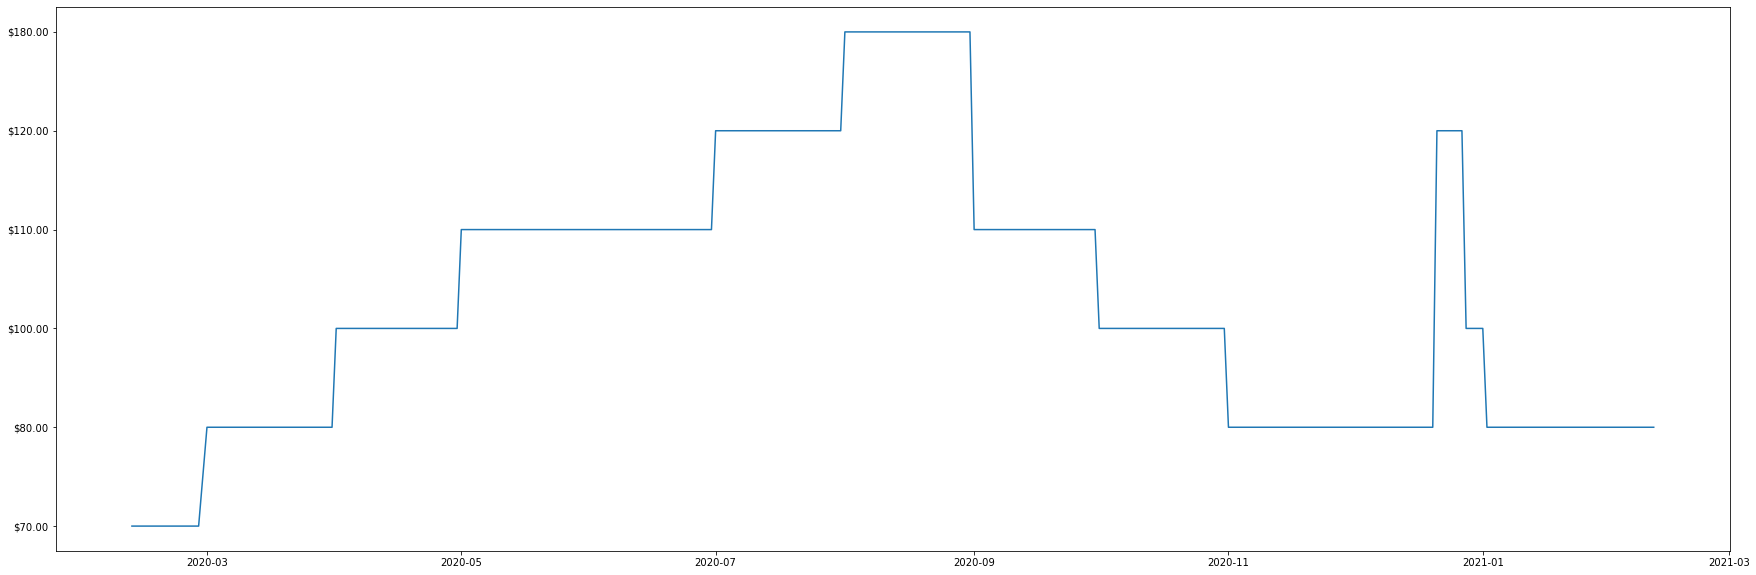

In [15]:
plt.figure(figsize=(30,10))
plt.plot(df_one.date, df_one.adjusted_price)

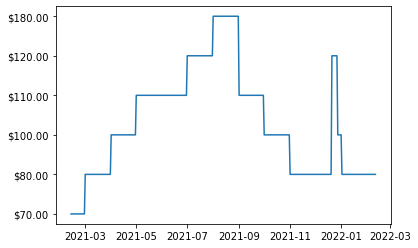

In [16]:
# Tästä nähdään että dataan on tullut ihme viiva, mutta varsinainen hintoja kuvaava käyrä on sama oikeilla vuosiluvuilla
plt.plot(df_new_one.date, df_one.adjusted_price)

In [13]:
# Muutetaan sekä price että adjusted price numeroiksi
df_one.price = df_one.price.str.strip('$')
df_one.price = pd.to_numeric(df_one.price)

AttributeError: Can only use .str accessor with string values!

In [14]:
df_one.adjusted_price = df_one.adjusted_price.str.strip('$')
df_one.adjusted_price = pd.to_numeric(df_one.adjusted_price)

AttributeError: Can only use .str accessor with string values!

In [49]:
#for x in df_comb['price']:
   # if x == "2,270.00":
    #    x.str.replace(',', '')
#df_comb['price'] = df_comb['price'].replace(',','', regex=True)
df_comb['price'] = df_comb.apply(lambda x: x['price'].str.replace(',', '') if x['price'] == '2,270.00' else x['price'])
#df_one['date'] = df_one.apply(lambda x: x['date'].replace(2020) if x['date'].year == 2021 else x['date'], axis=1)
df_comb.price = df_comb.price.str.strip('$')
df_comb.price = pd.to_numeric(df_comb.price)

df_comb.adjusted_price = df_comb.adjusted_price.str.strip('$')
df_comb.adjusted_price = pd.to_numeric(df_comb.adjusted_price)

TypeError: string indices must be integers

In [22]:
df_one.head()

,id,description,property_type,bedrooms,price,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,reviews_per_month,date,available,adjusted_price
0,15420,"Stunning, impeccably refurbished spacious grou...",Entire apartment,1,70.0,3,30,340,99.0,10.0,2.77,2020-02-12,f,70.0
1,15420,"Stunning, impeccably refurbished spacious grou...",Entire apartment,1,70.0,3,30,340,99.0,10.0,2.77,2020-02-13,f,70.0
2,15420,"Stunning, impeccably refurbished spacious grou...",Entire apartment,1,70.0,3,30,340,99.0,10.0,2.77,2020-02-14,f,70.0
3,15420,"Stunning, impeccably refurbished spacious grou...",Entire apartment,1,70.0,3,30,340,99.0,10.0,2.77,2020-02-15,f,70.0
4,15420,"Stunning, impeccably refurbished spacious grou...",Entire apartment,1,70.0,3,30,340,99.0,10.0,2.77,2020-02-16,f,70.0


In [27]:
df_comb.head()

,id,description,neighbourhood_cleansed,property_type,bedrooms,price,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,reviews_per_month,date,available,adjusted_price
0,15420,"Stunning, impeccably refurbished spacious grou...","Old Town, Princes Street and Leith Street",Entire apartment,1,70.00,3,30,340,99.0,10.0,2.77,2021-02-12,f,70.0
1,15420,"Stunning, impeccably refurbished spacious grou...","Old Town, Princes Street and Leith Street",Entire apartment,1,70.00,3,30,340,99.0,10.0,2.77,2021-02-13,f,70.0
2,15420,"Stunning, impeccably refurbished spacious grou...","Old Town, Princes Street and Leith Street",Entire apartment,1,70.00,3,30,340,99.0,10.0,2.77,2021-02-14,f,70.0
3,15420,"Stunning, impeccably refurbished spacious grou...","Old Town, Princes Street and Leith Street",Entire apartment,1,70.00,3,30,340,99.0,10.0,2.77,2021-02-15,f,70.0
4,15420,"Stunning, impeccably refurbished spacious grou...","Old Town, Princes Street and Leith Street",Entire apartment,1,70.00,3,30,340,99.0,10.0,2.77,2021-02-16,f,70.0


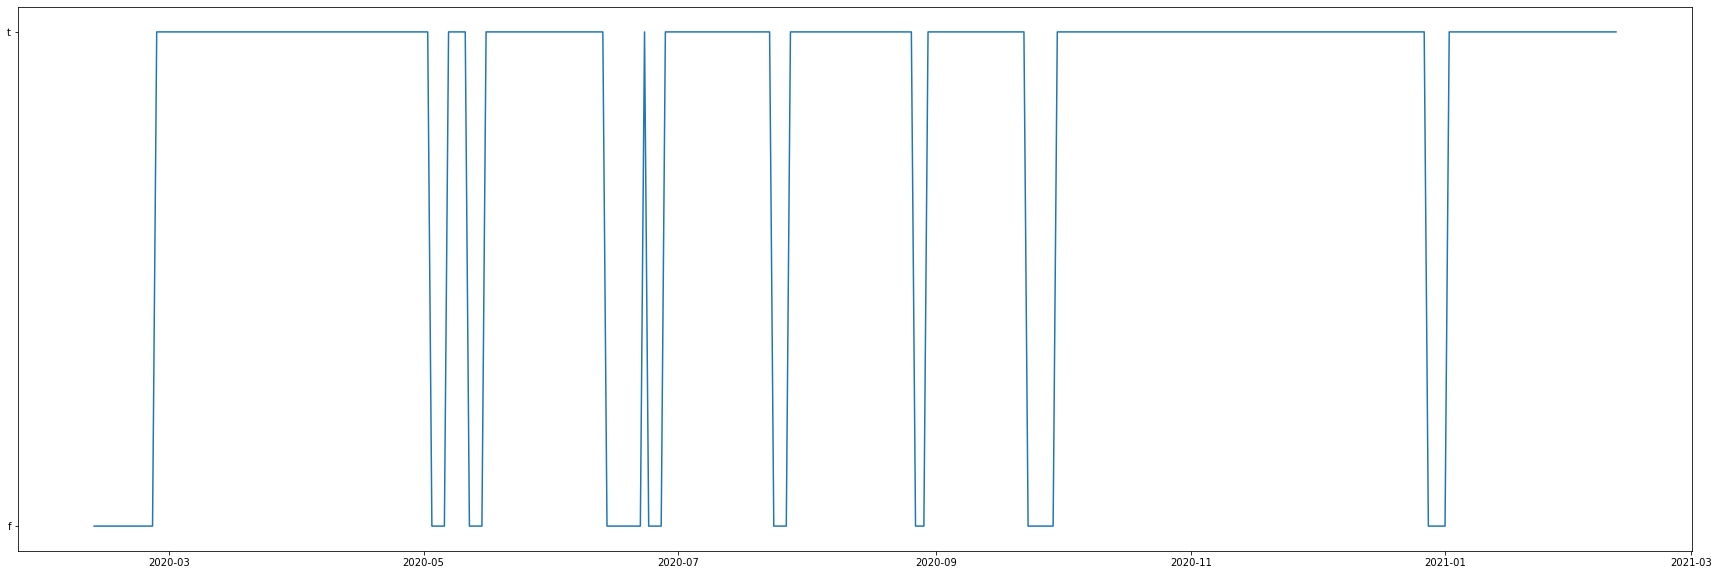

In [24]:
plt.figure(figsize=(30,10))
plt.plot(df_one.date, df_one.available)

In [15]:
#testaa tätä, joni jaakkonen harkkatyöstä
#muista ajaa counter
neighbourhood_values = df_comb['neighbourhood_cleansed'].value_counts().rename_axis('neighbourhood_cleansed').reset_index(name = 'counts')
print(neighbourhood_values)

                        neighbourhood_cleansed  counts
0    Old Town, Princes Street and Leith Street  270850
1                                Deans Village  147465
2                                    Tollcross  116808
3                     Hillside and Calton Hill   88708
4                                New Town West   75559
..                                         ...     ...
106                         Corstorphine North    2555
107           Barnton, Cammo and Cramond South    2190
108                              Carrick Knowe    2190
109                           Queensferry West    2190
110                               Fairmilehead    1095

[111 rows x 2 columns]


,neighbourhood_cleansed,counts
0,"Old Town, Princes Street and Leith Street",270850
1,Deans Village,147465
2,Tollcross,116808
3,Hillside and Calton Hill,88708
4,New Town West,75559


In [53]:
#datet puuttuu --> miten ne saisi mukaan taulukkoon?
#grouped_df = df_comb.groupby('neighbourhood_cleansed')

#mean_df = grouped_df.mean()
#mean_df = pd.merge(mean_df, neighbourhood_values, how = 'left', on = 'neighbourhood_cleansed')
#mean_df = pd.merge(mean_df, df_comb, how = 'left', on = 'neighbourhood_cleansed')
#mean_df.head(10)
grouped_date = df_comb.groupby('date')

KeyError: 'date'

In [20]:
grouped_date.head()

In [50]:
df_one.head()

,id,description,neighbourhood_cleansed,property_type,bedrooms,price,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,reviews_per_month,date,available,adjusted_price
0,15420,"Stunning, impeccably refurbished spacious grou...","Old Town, Princes Street and Leith Street",Entire apartment,1,70.0,3,30,340,99.0,10.0,2.77,2020-02-12,f,70.0
1,15420,"Stunning, impeccably refurbished spacious grou...","Old Town, Princes Street and Leith Street",Entire apartment,1,70.0,3,30,340,99.0,10.0,2.77,2020-02-13,f,70.0
2,15420,"Stunning, impeccably refurbished spacious grou...","Old Town, Princes Street and Leith Street",Entire apartment,1,70.0,3,30,340,99.0,10.0,2.77,2020-02-14,f,70.0
3,15420,"Stunning, impeccably refurbished spacious grou...","Old Town, Princes Street and Leith Street",Entire apartment,1,70.0,3,30,340,99.0,10.0,2.77,2020-02-15,f,70.0
4,15420,"Stunning, impeccably refurbished spacious grou...","Old Town, Princes Street and Leith Street",Entire apartment,1,70.0,3,30,340,99.0,10.0,2.77,2020-02-16,f,70.0
